# Kerakli kutubxonalarni yuklab olish

In [1]:
import fastai
import torch
from fastai.vision.all import *
from tqdm import tqdm
from torch.utils.data import dataloader

Dataset uchun pathni ko'rsatish

In [2]:
path = Path('../input/pnevmoniya/train')
fls = get_image_files(path)

Datablock, dataloader yaratish va ma'lumotlarni o'qitish

In [3]:
pneumoniya = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.1, seed=10),
    get_y = parent_label,
    item_tfms = Resize(128)
)

# Data loader
dls = pneumoniya.dataloaders(path)

# Train
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(7) # ma'lumotlar 7 ta epochda train qilinadi


/opt/conda/lib/python3.7/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/model

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.498763,0.200192,0.952015,04:15


epoch,train_loss,valid_loss,accuracy,time
0,0.182662,0.087950,0.976967,06:03
1,0.123456,0.063852,0.976967,06:02
2,0.093202,0.064200,0.978887,06:03
3,0.051405,0.034699,0.982726,05:39
4,0.036231,0.040306,0.982726,04:37
5,0.022196,0.061757,0.975048,04:38
6,0.011543,0.045915,0.982726,04:35


Confusion matrix grafigi

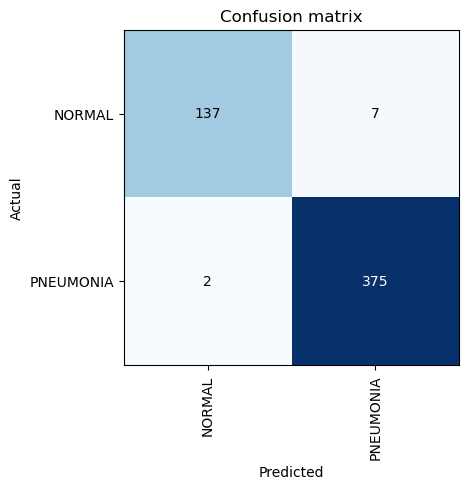

In [4]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Validation ma'lumotlardagi xatoligi eng katta 3 ta tasvir

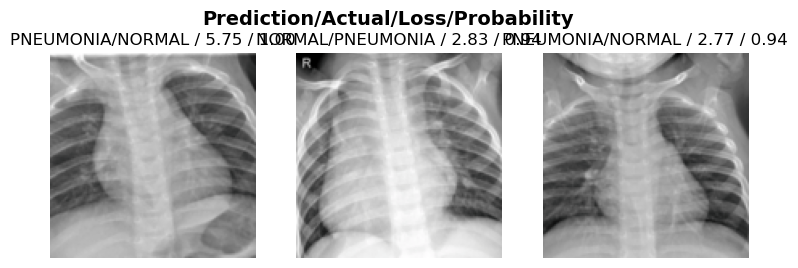

In [5]:
interp.plot_top_losses(3)

Test ma'lumotlarini bashorat qilish

In [6]:
files = !ls "../input/pnevmoniya/test"
preds = []
numbers = []
for file in tqdm(files):
    number, n_th, probs = learn.predict(f"../input/pnevmoniya/test/{file}")
    preds.append(n_th)
    numbers.append(number)

  0%|          | 0/624 [00:00<?, ?it/s]

  0%|          | 1/624 [00:00<01:05,  9.47it/s]

  0%|          | 2/624 [00:00<01:27,  7.10it/s]

  0%|          | 3/624 [00:00<01:17,  8.06it/s]

  1%|          | 5/624 [00:00<01:16,  8.14it/s]

  1%|          | 7/624 [00:00<01:07,  9.12it/s]

  1%|▏         | 9/624 [00:00<01:02,  9.78it/s]

  2%|▏         | 11/624 [00:01<01:03,  9.61it/s]

  2%|▏         | 13/624 [00:01<00:58, 10.43it/s]

  2%|▏         | 15/624 [00:01<01:01,  9.92it/s]

  3%|▎         | 17/624 [00:01<00:56, 10.68it/s]

  3%|▎         | 19/624 [00:01<00:55, 10.99it/s]

  3%|▎         | 21/624 [00:02<01:01,  9.81it/s]

  4%|▎         | 23/624 [00:02<00:58, 10.27it/s]

  4%|▍         | 25/624 [00:02<00:59, 10.14it/s]

  4%|▍         | 27/624 [00:02<00:58, 10.26it/s]

  5%|▍         | 29/624 [00:02<00:57, 10.34it/s]

  5%|▍         | 31/624 [00:03<00:57, 10.26it/s]

  5%|▌         | 33/624 [00:03<00:54, 10.81it/s]

  6%|▌         | 35/624 [00:03<00:50, 11.57it/s]

  6%|▌         | 37/624 [00:03<00:52, 11.24it/s]

  6%|▋         | 39/624 [00:03<00:50, 11.60it/s]

  7%|▋         | 41/624 [00:03<00:54, 10.68it/s]

  7%|▋         | 43/624 [00:04<00:59,  9.71it/s]

  7%|▋         | 45/624 [00:04<00:59,  9.78it/s]

  8%|▊         | 47/624 [00:04<00:59,  9.71it/s]

  8%|▊         | 49/624 [00:04<00:58,  9.85it/s]

  8%|▊         | 51/624 [00:05<01:03,  9.01it/s]

  8%|▊         | 53/624 [00:05<01:02,  9.08it/s]

  9%|▉         | 55/624 [00:05<00:59,  9.53it/s]

  9%|▉         | 57/624 [00:05<00:54, 10.48it/s]

  9%|▉         | 59/624 [00:05<00:56, 10.00it/s]

 10%|▉         | 61/624 [00:06<00:56,  9.96it/s]

 10%|█         | 63/624 [00:06<00:53, 10.46it/s]

 10%|█         | 65/624 [00:06<00:52, 10.69it/s]

 11%|█         | 67/624 [00:06<00:51, 10.75it/s]

 11%|█         | 69/624 [00:06<00:56,  9.84it/s]

 11%|█▏        | 71/624 [00:07<00:55,  9.90it/s]

 12%|█▏        | 73/624 [00:07<00:54, 10.12it/s]

 12%|█▏        | 75/624 [00:07<00:55,  9.87it/s]

 12%|█▏        | 77/624 [00:07<00:53, 10.24it/s]

 13%|█▎        | 79/624 [00:07<00:49, 10.96it/s]

 13%|█▎        | 81/624 [00:07<00:47, 11.34it/s]

 13%|█▎        | 83/624 [00:08<00:49, 11.04it/s]

 14%|█▎        | 85/624 [00:08<00:47, 11.36it/s]

 14%|█▍        | 87/624 [00:08<00:45, 11.90it/s]

 14%|█▍        | 89/624 [00:08<00:44, 12.09it/s]

 15%|█▍        | 91/624 [00:08<00:45, 11.74it/s]

 15%|█▍        | 93/624 [00:08<00:45, 11.61it/s]

 15%|█▌        | 95/624 [00:09<00:48, 10.85it/s]

 16%|█▌        | 97/624 [00:09<00:52, 10.02it/s]

 16%|█▌        | 99/624 [00:09<00:52,  9.98it/s]

 16%|█▌        | 101/624 [00:09<00:49, 10.58it/s]

 17%|█▋        | 103/624 [00:09<00:48, 10.81it/s]

 17%|█▋        | 105/624 [00:10<00:46, 11.17it/s]

 17%|█▋        | 107/624 [00:10<00:51, 10.04it/s]

 17%|█▋        | 109/624 [00:10<00:52,  9.74it/s]

 18%|█▊        | 110/624 [00:10<00:54,  9.50it/s]

 18%|█▊        | 112/624 [00:10<00:55,  9.28it/s]

 18%|█▊        | 113/624 [00:11<00:54,  9.39it/s]

 18%|█▊        | 114/624 [00:11<00:54,  9.38it/s]

 19%|█▊        | 116/624 [00:11<00:48, 10.41it/s]

 19%|█▉        | 118/624 [00:11<00:48, 10.37it/s]

 19%|█▉        | 120/624 [00:11<00:50, 10.01it/s]

 20%|█▉        | 122/624 [00:11<00:46, 10.69it/s]

 20%|█▉        | 124/624 [00:12<00:43, 11.52it/s]

 20%|██        | 126/624 [00:12<00:44, 11.07it/s]

 21%|██        | 128/624 [00:12<00:44, 11.10it/s]

 21%|██        | 130/624 [00:12<00:46, 10.73it/s]

 21%|██        | 132/624 [00:12<00:43, 11.24it/s]

 21%|██▏       | 134/624 [00:12<00:43, 11.30it/s]

 22%|██▏       | 136/624 [00:13<00:48, 10.11it/s]

 22%|██▏       | 138/624 [00:13<00:49,  9.77it/s]

 22%|██▏       | 140/624 [00:13<00:46, 10.50it/s]

 23%|██▎       | 142/624 [00:13<00:47, 10.16it/s]

 23%|██▎       | 144/624 [00:13<00:44, 10.81it/s]

 23%|██▎       | 146/624 [00:14<00:42, 11.24it/s]

 24%|██▎       | 148/624 [00:14<00:41, 11.51it/s]

 24%|██▍       | 150/624 [00:14<00:42, 11.19it/s]

 24%|██▍       | 152/624 [00:14<00:42, 11.20it/s]

 25%|██▍       | 154/624 [00:14<00:40, 11.67it/s]

 25%|██▌       | 156/624 [00:14<00:42, 11.09it/s]

 25%|██▌       | 158/624 [00:15<00:42, 10.86it/s]

 26%|██▌       | 160/624 [00:15<00:43, 10.55it/s]

 26%|██▌       | 162/624 [00:15<00:44, 10.28it/s]

 26%|██▋       | 164/624 [00:15<00:43, 10.47it/s]

 27%|██▋       | 166/624 [00:15<00:44, 10.20it/s]

 27%|██▋       | 168/624 [00:16<00:42, 10.79it/s]

 27%|██▋       | 170/624 [00:16<00:40, 11.10it/s]

 28%|██▊       | 172/624 [00:16<00:39, 11.54it/s]

 28%|██▊       | 174/624 [00:16<00:39, 11.47it/s]

 28%|██▊       | 176/624 [00:16<00:40, 11.02it/s]

 29%|██▊       | 178/624 [00:17<00:43, 10.25it/s]

 29%|██▉       | 180/624 [00:17<00:41, 10.58it/s]

 29%|██▉       | 182/624 [00:17<00:40, 10.85it/s]

 29%|██▉       | 184/624 [00:17<00:41, 10.55it/s]

 30%|██▉       | 186/624 [00:17<00:39, 11.01it/s]

 30%|███       | 188/624 [00:17<00:39, 11.01it/s]

 30%|███       | 190/624 [00:18<00:37, 11.51it/s]

 31%|███       | 192/624 [00:18<00:37, 11.60it/s]

 31%|███       | 194/624 [00:18<00:43,  9.78it/s]

 31%|███▏      | 196/624 [00:18<00:42, 10.00it/s]

 32%|███▏      | 198/624 [00:18<00:39, 10.69it/s]

 32%|███▏      | 200/624 [00:19<00:39, 10.82it/s]

 32%|███▏      | 202/624 [00:19<00:38, 10.88it/s]

 33%|███▎      | 204/624 [00:19<00:39, 10.71it/s]

 33%|███▎      | 206/624 [00:19<00:38, 10.85it/s]

 33%|███▎      | 208/624 [00:19<00:36, 11.29it/s]

 34%|███▎      | 210/624 [00:20<00:38, 10.64it/s]

 34%|███▍      | 212/624 [00:20<00:36, 11.29it/s]

 34%|███▍      | 214/624 [00:20<00:38, 10.60it/s]

 35%|███▍      | 216/624 [00:20<00:41,  9.86it/s]

 35%|███▍      | 218/624 [00:20<00:40, 10.09it/s]

 35%|███▌      | 220/624 [00:20<00:39, 10.29it/s]

 36%|███▌      | 222/624 [00:21<00:41,  9.64it/s]

 36%|███▌      | 224/624 [00:21<00:39, 10.06it/s]

 36%|███▌      | 226/624 [00:21<00:36, 10.85it/s]

 37%|███▋      | 228/624 [00:21<00:37, 10.55it/s]

 37%|███▋      | 230/624 [00:21<00:35, 11.00it/s]

 37%|███▋      | 232/624 [00:22<00:38, 10.31it/s]

 38%|███▊      | 234/624 [00:22<00:36, 10.67it/s]

 38%|███▊      | 236/624 [00:22<00:37, 10.22it/s]

 38%|███▊      | 238/624 [00:22<00:37, 10.16it/s]

 38%|███▊      | 240/624 [00:22<00:37, 10.25it/s]

 39%|███▉      | 242/624 [00:23<00:37, 10.19it/s]

 39%|███▉      | 244/624 [00:23<00:37, 10.25it/s]

 39%|███▉      | 246/624 [00:23<00:34, 10.81it/s]

 40%|███▉      | 248/624 [00:23<00:34, 10.82it/s]

 40%|████      | 250/624 [00:23<00:39,  9.40it/s]

 40%|████      | 252/624 [00:24<00:37,  9.98it/s]

 41%|████      | 254/624 [00:24<00:34, 10.62it/s]

 41%|████      | 256/624 [00:24<00:33, 10.84it/s]

 41%|████▏     | 258/624 [00:24<00:35, 10.45it/s]

 42%|████▏     | 260/624 [00:24<00:32, 11.18it/s]

 42%|████▏     | 262/624 [00:24<00:31, 11.44it/s]

 42%|████▏     | 264/624 [00:25<00:31, 11.61it/s]

 43%|████▎     | 266/624 [00:25<00:34, 10.34it/s]

 43%|████▎     | 268/624 [00:25<00:35,  9.99it/s]

 43%|████▎     | 270/624 [00:25<00:33, 10.52it/s]

 44%|████▎     | 272/624 [00:25<00:31, 11.17it/s]

 44%|████▍     | 274/624 [00:26<00:31, 10.97it/s]

 44%|████▍     | 276/624 [00:26<00:31, 11.15it/s]

 45%|████▍     | 278/624 [00:26<00:35,  9.63it/s]

 45%|████▍     | 280/624 [00:26<00:34, 10.11it/s]

 45%|████▌     | 282/624 [00:26<00:34,  9.80it/s]

 46%|████▌     | 284/624 [00:27<00:32, 10.61it/s]

 46%|████▌     | 286/624 [00:27<00:33, 10.11it/s]

 46%|████▌     | 288/624 [00:27<00:31, 10.75it/s]

 46%|████▋     | 290/624 [00:27<00:34,  9.76it/s]

 47%|████▋     | 292/624 [00:27<00:36,  9.09it/s]

 47%|████▋     | 293/624 [00:28<00:38,  8.58it/s]

 47%|████▋     | 294/624 [00:28<00:40,  8.18it/s]

 47%|████▋     | 295/624 [00:28<00:42,  7.72it/s]

 47%|████▋     | 296/624 [00:28<00:40,  8.07it/s]

 48%|████▊     | 298/624 [00:28<00:35,  9.07it/s]

 48%|████▊     | 300/624 [00:28<00:32,  9.96it/s]

 48%|████▊     | 302/624 [00:29<00:33,  9.55it/s]

 49%|████▊     | 304/624 [00:29<00:31, 10.31it/s]

 49%|████▉     | 306/624 [00:29<00:33,  9.43it/s]

 49%|████▉     | 308/624 [00:29<00:33,  9.54it/s]

 50%|████▉     | 310/624 [00:29<00:33,  9.41it/s]

 50%|█████     | 312/624 [00:30<00:31,  9.95it/s]

 50%|█████     | 314/624 [00:30<00:28, 10.78it/s]

 51%|█████     | 316/624 [00:30<00:28, 10.83it/s]

 51%|█████     | 318/624 [00:30<00:26, 11.42it/s]

 51%|█████▏    | 320/624 [00:30<00:27, 11.14it/s]

 52%|█████▏    | 322/624 [00:30<00:26, 11.46it/s]

 52%|█████▏    | 324/624 [00:31<00:27, 11.01it/s]

 52%|█████▏    | 326/624 [00:31<00:27, 10.78it/s]

 53%|█████▎    | 328/624 [00:31<00:27, 10.95it/s]

 53%|█████▎    | 330/624 [00:31<00:26, 11.22it/s]

 53%|█████▎    | 332/624 [00:31<00:26, 11.14it/s]

 54%|█████▎    | 334/624 [00:32<00:29,  9.74it/s]

 54%|█████▍    | 336/624 [00:32<00:30,  9.56it/s]

 54%|█████▍    | 338/624 [00:32<00:28,  9.99it/s]

 54%|█████▍    | 340/624 [00:32<00:29,  9.51it/s]

 55%|█████▍    | 342/624 [00:32<00:28,  9.89it/s]

 55%|█████▌    | 344/624 [00:33<00:29,  9.43it/s]

 55%|█████▌    | 346/624 [00:33<00:28,  9.85it/s]

 56%|█████▌    | 348/624 [00:33<00:27, 10.21it/s]

 56%|█████▌    | 350/624 [00:33<00:25, 10.89it/s]

 56%|█████▋    | 352/624 [00:33<00:25, 10.61it/s]

 57%|█████▋    | 354/624 [00:34<00:24, 10.94it/s]

 57%|█████▋    | 356/624 [00:34<00:23, 11.43it/s]

 57%|█████▋    | 358/624 [00:34<00:23, 11.18it/s]

 58%|█████▊    | 360/624 [00:34<00:25, 10.28it/s]

 58%|█████▊    | 362/624 [00:34<00:24, 10.72it/s]

 58%|█████▊    | 364/624 [00:34<00:23, 10.86it/s]

 59%|█████▊    | 366/624 [00:35<00:23, 11.20it/s]

 59%|█████▉    | 368/624 [00:35<00:22, 11.37it/s]

 59%|█████▉    | 370/624 [00:35<00:24, 10.23it/s]

 60%|█████▉    | 372/624 [00:35<00:24, 10.39it/s]

 60%|█████▉    | 374/624 [00:35<00:23, 10.81it/s]

 60%|██████    | 376/624 [00:36<00:22, 11.20it/s]

 61%|██████    | 378/624 [00:36<00:21, 11.61it/s]

 61%|██████    | 380/624 [00:36<00:23, 10.46it/s]

 61%|██████    | 382/624 [00:36<00:22, 10.79it/s]

 62%|██████▏   | 384/624 [00:36<00:20, 11.44it/s]

 62%|██████▏   | 386/624 [00:37<00:22, 10.72it/s]

 62%|██████▏   | 388/624 [00:37<00:22, 10.59it/s]

 62%|██████▎   | 390/624 [00:37<00:20, 11.36it/s]

 63%|██████▎   | 392/624 [00:37<00:21, 11.05it/s]

 63%|██████▎   | 394/624 [00:37<00:20, 11.27it/s]

 63%|██████▎   | 396/624 [00:37<00:19, 11.56it/s]

 64%|██████▍   | 398/624 [00:38<00:19, 11.56it/s]

 64%|██████▍   | 400/624 [00:38<00:21, 10.52it/s]

 64%|██████▍   | 402/624 [00:38<00:20, 10.80it/s]

 65%|██████▍   | 404/624 [00:38<00:20, 10.90it/s]

 65%|██████▌   | 406/624 [00:38<00:21, 10.27it/s]

 65%|██████▌   | 408/624 [00:39<00:20, 10.73it/s]

 66%|██████▌   | 410/624 [00:39<00:19, 10.95it/s]

 66%|██████▌   | 412/624 [00:39<00:18, 11.76it/s]

 66%|██████▋   | 414/624 [00:39<00:17, 12.35it/s]

 67%|██████▋   | 416/624 [00:39<00:16, 12.87it/s]

 67%|██████▋   | 418/624 [00:39<00:16, 12.31it/s]

 67%|██████▋   | 420/624 [00:39<00:15, 12.81it/s]

 68%|██████▊   | 422/624 [00:40<00:15, 13.01it/s]

 68%|██████▊   | 424/624 [00:40<00:15, 13.06it/s]

 68%|██████▊   | 426/624 [00:40<00:15, 13.17it/s]

 69%|██████▊   | 428/624 [00:40<00:15, 12.62it/s]

 69%|██████▉   | 430/624 [00:40<00:15, 12.57it/s]

 69%|██████▉   | 432/624 [00:40<00:16, 11.84it/s]

 70%|██████▉   | 434/624 [00:41<00:15, 12.37it/s]

 70%|██████▉   | 436/624 [00:41<00:15, 12.41it/s]

 70%|███████   | 438/624 [00:41<00:15, 12.18it/s]

 71%|███████   | 440/624 [00:41<00:14, 12.65it/s]

 71%|███████   | 442/624 [00:41<00:14, 12.73it/s]

 71%|███████   | 444/624 [00:41<00:15, 11.31it/s]

 71%|███████▏  | 446/624 [00:42<00:14, 11.88it/s]

 72%|███████▏  | 448/624 [00:42<00:14, 12.45it/s]

 72%|███████▏  | 450/624 [00:42<00:13, 12.75it/s]

 72%|███████▏  | 452/624 [00:42<00:13, 13.14it/s]

 73%|███████▎  | 454/624 [00:42<00:12, 13.09it/s]

 73%|███████▎  | 456/624 [00:42<00:13, 12.79it/s]

 73%|███████▎  | 458/624 [00:42<00:12, 12.78it/s]

 74%|███████▎  | 460/624 [00:43<00:12, 13.18it/s]

 74%|███████▍  | 462/624 [00:43<00:12, 13.42it/s]

 74%|███████▍  | 464/624 [00:43<00:11, 13.41it/s]

 75%|███████▍  | 466/624 [00:43<00:11, 13.56it/s]

 75%|███████▌  | 468/624 [00:43<00:12, 12.69it/s]

 75%|███████▌  | 470/624 [00:43<00:11, 13.06it/s]

 76%|███████▌  | 472/624 [00:44<00:11, 12.88it/s]

 76%|███████▌  | 474/624 [00:44<00:11, 12.62it/s]

 76%|███████▋  | 476/624 [00:44<00:11, 13.01it/s]

 77%|███████▋  | 478/624 [00:44<00:11, 13.25it/s]

 77%|███████▋  | 480/624 [00:44<00:10, 13.29it/s]

 77%|███████▋  | 482/624 [00:44<00:10, 13.35it/s]

 78%|███████▊  | 484/624 [00:44<00:10, 13.39it/s]

 78%|███████▊  | 486/624 [00:45<00:10, 13.55it/s]

 78%|███████▊  | 488/624 [00:45<00:10, 13.50it/s]

 79%|███████▊  | 490/624 [00:45<00:09, 13.66it/s]

 79%|███████▉  | 492/624 [00:45<00:11, 11.71it/s]

 79%|███████▉  | 494/624 [00:45<00:10, 12.42it/s]

 79%|███████▉  | 496/624 [00:45<00:09, 12.97it/s]

 80%|███████▉  | 498/624 [00:46<00:09, 13.25it/s]

 80%|████████  | 500/624 [00:46<00:09, 13.33it/s]

 80%|████████  | 502/624 [00:46<00:09, 13.24it/s]

 81%|████████  | 504/624 [00:46<00:09, 13.14it/s]

 81%|████████  | 506/624 [00:46<00:08, 13.16it/s]

 81%|████████▏ | 508/624 [00:46<00:08, 13.16it/s]

 82%|████████▏ | 510/624 [00:46<00:08, 13.15it/s]

 82%|████████▏ | 512/624 [00:47<00:08, 13.20it/s]

 82%|████████▏ | 514/624 [00:47<00:08, 13.32it/s]

 83%|████████▎ | 516/624 [00:47<00:08, 13.09it/s]

 83%|████████▎ | 518/624 [00:47<00:07, 13.30it/s]

 83%|████████▎ | 520/624 [00:47<00:07, 13.41it/s]

 84%|████████▎ | 522/624 [00:47<00:08, 12.66it/s]

 84%|████████▍ | 524/624 [00:48<00:08, 11.74it/s]

 84%|████████▍ | 526/624 [00:48<00:08, 11.87it/s]

 85%|████████▍ | 528/624 [00:48<00:08, 11.29it/s]

 85%|████████▍ | 530/624 [00:48<00:08, 11.35it/s]

 85%|████████▌ | 532/624 [00:48<00:07, 11.78it/s]

 86%|████████▌ | 534/624 [00:48<00:07, 11.90it/s]

 86%|████████▌ | 536/624 [00:49<00:07, 12.09it/s]

 86%|████████▌ | 538/624 [00:49<00:07, 12.09it/s]

 87%|████████▋ | 540/624 [00:49<00:07, 11.53it/s]

 87%|████████▋ | 542/624 [00:49<00:06, 12.07it/s]

 87%|████████▋ | 544/624 [00:49<00:06, 12.15it/s]

 88%|████████▊ | 546/624 [00:49<00:06, 12.59it/s]

 88%|████████▊ | 548/624 [00:50<00:06, 12.51it/s]

 88%|████████▊ | 550/624 [00:50<00:05, 12.61it/s]

 88%|████████▊ | 552/624 [00:50<00:05, 12.41it/s]

 89%|████████▉ | 554/624 [00:50<00:05, 11.97it/s]

 89%|████████▉ | 556/624 [00:50<00:05, 11.62it/s]

 89%|████████▉ | 558/624 [00:50<00:05, 11.44it/s]

 90%|████████▉ | 560/624 [00:51<00:05, 11.37it/s]

 90%|█████████ | 562/624 [00:51<00:05, 11.48it/s]

 90%|█████████ | 564/624 [00:51<00:05, 11.78it/s]

 91%|█████████ | 566/624 [00:51<00:04, 11.90it/s]

 91%|█████████ | 568/624 [00:51<00:04, 12.02it/s]

 91%|█████████▏| 570/624 [00:51<00:04, 12.15it/s]

 92%|█████████▏| 572/624 [00:52<00:04, 12.19it/s]

 92%|█████████▏| 574/624 [00:52<00:04, 12.46it/s]

 92%|█████████▏| 576/624 [00:52<00:03, 12.54it/s]

 93%|█████████▎| 578/624 [00:52<00:03, 12.34it/s]

 93%|█████████▎| 580/624 [00:52<00:03, 12.39it/s]

 93%|█████████▎| 582/624 [00:52<00:03, 12.75it/s]

 94%|█████████▎| 584/624 [00:52<00:03, 13.11it/s]

 94%|█████████▍| 586/624 [00:53<00:03, 12.48it/s]

 94%|█████████▍| 588/624 [00:53<00:02, 12.45it/s]

 95%|█████████▍| 590/624 [00:53<00:02, 12.20it/s]

 95%|█████████▍| 592/624 [00:53<00:02, 12.42it/s]

 95%|█████████▌| 594/624 [00:53<00:02, 12.73it/s]

 96%|█████████▌| 596/624 [00:53<00:02, 12.40it/s]

 96%|█████████▌| 598/624 [00:54<00:02, 12.53it/s]

 96%|█████████▌| 600/624 [00:54<00:01, 12.25it/s]

 96%|█████████▋| 602/624 [00:54<00:02, 10.74it/s]

 97%|█████████▋| 604/624 [00:54<00:02,  8.78it/s]

 97%|█████████▋| 606/624 [00:55<00:01,  9.44it/s]

 97%|█████████▋| 608/624 [00:55<00:01,  9.93it/s]

 98%|█████████▊| 610/624 [00:55<00:01,  9.46it/s]

 98%|█████████▊| 612/624 [00:55<00:01,  9.61it/s]

 98%|█████████▊| 614/624 [00:55<00:00, 10.26it/s]

 99%|█████████▊| 616/624 [00:55<00:00, 10.95it/s]

 99%|█████████▉| 618/624 [00:56<00:00, 10.36it/s]

 99%|█████████▉| 620/624 [00:56<00:00, 10.73it/s]

100%|█████████▉| 622/624 [00:56<00:00, 10.21it/s]

100%|██████████| 624/624 [00:56<00:00, 11.00it/s]


Bashorat qilingan qiymatlarni 0 va 1 ko'rinishida bo'sh ro'yhatga saqlab olish

In [7]:
predict = []
for num in numbers:
    if num == 'NORMAL':
        predict.append(0)
    elif num == 'PNEUMONIA':
        predict.append(1)

Submission faylni yuklab olish

In [8]:
df = pd.read_csv('../input/pnevmoniya/sample_solution.csv')
df.head()

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0


In [9]:
len(predict) # hosil qilingan ro'yhatimiz uzunligi

624

Submission jadvaliga predict ro'yhatimizni labels ustuni qilib joylashtirish

In [10]:
df['labels'] = predict
df.head()

,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,1
3,test_img_10004.jpeg,1
4,test_img_10005.jpeg,0


Yakuniy dataframeni .csv fayl ko'rinishida saqlab olish

In [11]:
df.to_csv('pneumonia.csv', index=False)